In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('LOCAL_NSE-TATAGLOBAL.csv')
dataset_train.head()

,Unnamed: 0,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [2]:
data=dataset_train.loc[: , dataset_train.columns != 'Date']
data.head()

,Unnamed: 0,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
training_set = data.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
esize = 100
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = esize, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 15s 123ms/step - loss: 0.0108
Epoch 2/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0034
Epoch 3/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0032
Epoch 4/100
62/62 [==============================] - 9s 139ms/step - loss: 0.0029
Epoch 5/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0026
Epoch 6/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0026
Epoch 7/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0023
Epoch 9/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0022
Epoch 11/100
62/62 [==============================] - 8s 127ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0023
Epoch 13/100

62/62 [==============================] - 8s 127ms/step - loss: 7.0120e-04
Epoch 98/100
62/62 [==============================] - 8s 129ms/step - loss: 8.4141e-04
Epoch 99/100
62/62 [==============================] - 8s 128ms/step - loss: 8.1437e-04
Epoch 100/100
62/62 [==============================] - 8s 131ms/step - loss: 6.1282e-04


In [30]:
"""https://machinelearningknowledge.ai/keras-lstm-layer-explained-for-beginners-with-example/"""
dataset_test = pd.read_csv('tatatest.csv')
dataset_test.head(5)

,Unnamed: 0,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [31]:
data_test=dataset_test.loc[: , dataset_train.columns != 'Date']
data_test.head()

,Unnamed: 0,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,1,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,3,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,4,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [32]:
# real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price = data_test.iloc[:, 1:2].values

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\seeho\AppData\Local\Temp\ipykernel_17032\3731845041.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


1/1 [==============================] - 2s 2s/step


In [27]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [17]:
predicted_stock_price

array([[118.38068],
       [121.50964],
       [129.12515],
       [141.6606 ],
       [157.91937],
       [175.89977],
       [193.29391],
       [207.91386],
       [218.38892],
       [224.04706],
       [225.26486],
       [223.10704],
       [218.6225 ],
       [213.18855],
       [208.14156],
       [204.54173]], dtype=float32)

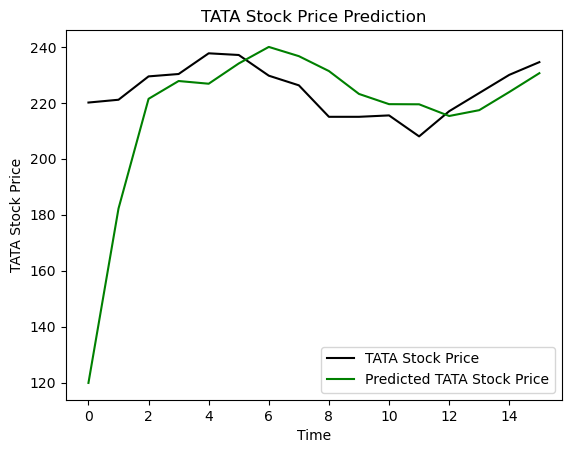

In [34]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()